# Review Probabilitas Bersyarat (Conditional Probability)

Pada notebook ini, kita akan membahas konsep probabilitas bersyarat yang sangat penting dalam statistika dan machine learning, terutama dalam konteks inferensi probabilistik dan pembelajaran mesin.

## Apa itu Probabilitas Bersyarat?

Probabilitas bersyarat adalah probabilitas terjadinya suatu kejadian A, dengan syarat kejadian B telah terjadi. Dinotasikan sebagai P(A|B).

\[ P(A|B) = \frac{P(A \cap B)}{P(B)} \]

di mana:
- P(A|B) adalah probabilitas A terjadi jika B terjadi
- P(A ∩ B) adalah probabilitas A dan B terjadi bersamaan
- P(B) adalah probabilitas B terjadi

## Konsep Penting

1. **Aturan Perkalian**:
   \[ P(A \cap B) = P(A|B)P(B) = P(B|A)P(A) \]

2. **Teorema Bayes**:
   \[ P(A|B) = \frac{P(B|A)P(A)}{P(B)} \]

3. **Independensi**:
   Jika A dan B independen, maka:
   \[ P(A|B) = P(A) \]

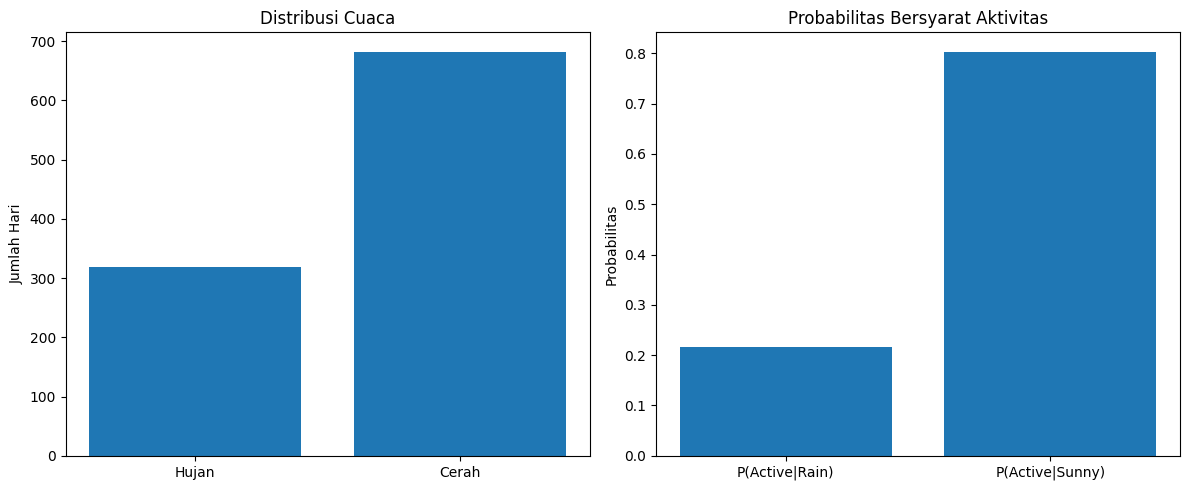

Probabilitas Bersyarat Empiris:
P(Active|Rain) = 0.2163
P(Active|Sunny) = 0.8018

Probabilitas Total:
P(Active) = 0.6150
P(Rain) = 0.3190


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Contoh sederhana probabilitas bersyarat
# Simulasikan data cuaca dan aktivitas orang
n_days = 1000

# Generate weather data (0: Hujan, 1: Cerah)
weather = np.random.choice([0, 1], size=n_days, p=[0.3, 0.7])

# Generate activity data berdasarkan cuaca
# P(Activity|Weather) untuk demonstrasi
p_activity_given_rain = 0.2    # P(Activity=1|Weather=0)
p_activity_given_sunny = 0.8   # P(Activity=1|Weather=1)

activity = np.zeros(n_days)
for i in range(n_days):
    if weather[i] == 0:  # Hujan
        activity[i] = np.random.choice([0, 1], p=[1-p_activity_given_rain, p_activity_given_rain])
    else:  # Cerah
        activity[i] = np.random.choice([0, 1], p=[1-p_activity_given_sunny, p_activity_given_sunny])

# Hitung probabilitas bersyarat empiris
p_active_given_rain = np.mean(activity[weather == 0])
p_active_given_sunny = np.mean(activity[weather == 1])

# Visualisasi
plt.figure(figsize=(12, 5))

# Plot 1: Distribusi Cuaca
plt.subplot(121)
weather_counts = np.bincount(weather)
plt.bar(['Hujan', 'Cerah'], weather_counts)
plt.title('Distribusi Cuaca')
plt.ylabel('Jumlah Hari')

# Plot 2: Probabilitas Bersyarat
plt.subplot(122)
plt.bar(['P(Active|Rain)', 'P(Active|Sunny)'], 
        [p_active_given_rain, p_active_given_sunny])
plt.title('Probabilitas Bersyarat Aktivitas')
plt.ylabel('Probabilitas')

plt.tight_layout()
plt.show()

print("Probabilitas Bersyarat Empiris:")
print(f"P(Active|Rain) = {p_active_given_rain:.4f}")
print(f"P(Active|Sunny) = {p_active_given_sunny:.4f}")

# Hitung probabilitas total
p_active = np.mean(activity)
p_rain = np.mean(weather == 0)
print(f"\nProbabilitas Total:")
print(f"P(Active) = {p_active:.4f}")
print(f"P(Rain) = {p_rain:.4f}")

## Teorema Bayes dalam Machine Learning

Teorema Bayes adalah fondasi dari banyak algoritma machine learning, terutama dalam:
1. Naive Bayes Classifier
2. Probabilistic Graphical Models
3. Bayesian Neural Networks
4. Maximum Likelihood Estimation

### Contoh: Naive Bayes Classifier

Naive Bayes menggunakan teorema Bayes untuk klasifikasi:

\[ P(y|x) = \frac{P(x|y)P(y)}{P(x)} \]

di mana:
- y adalah kelas
- x adalah fitur
- P(y|x) adalah probabilitas posterior
- P(x|y) adalah likelihood
- P(y) adalah prior
- P(x) adalah evidence

Mari kita implementasikan contoh sederhana:

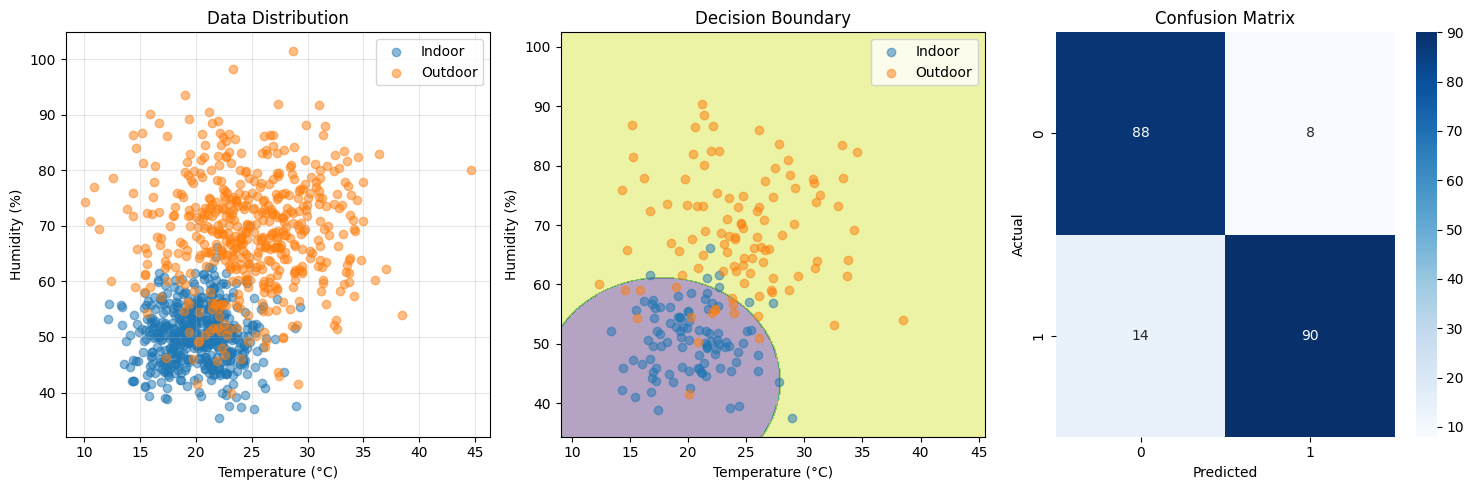

Classification Report:
              precision    recall  f1-score   support

      Indoor       0.86      0.92      0.89        96
     Outdoor       0.92      0.87      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Generate synthetic data
n_samples = 1000

# Feature 1: Temperature (Celsius)
temp_class0 = np.random.normal(20, 3, n_samples // 2)  # Indoor
temp_class1 = np.random.normal(25, 5, n_samples // 2)  # Outdoor

# Feature 2: Humidity (%)
humidity_class0 = np.random.normal(50, 5, n_samples // 2)  # Indoor
humidity_class1 = np.random.normal(70, 10, n_samples // 2)  # Outdoor

# Combine features
X = np.vstack([
    np.column_stack([temp_class0, humidity_class0]),
    np.column_stack([temp_class1, humidity_class1])
])
y = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Visualisasi
plt.figure(figsize=(15, 5))

# Plot data points
plt.subplot(131)
plt.scatter(X[y==0, 0], X[y==0, 1], alpha=0.5, label='Indoor')
plt.scatter(X[y==1, 0], X[y==1, 1], alpha=0.5, label='Outdoor')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Data Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot decision boundary
plt.subplot(132)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], alpha=0.5, label='Indoor')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], alpha=0.5, label='Outdoor')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Decision Boundary')
plt.legend()

# Plot confusion matrix
plt.subplot(133)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Indoor', 'Outdoor']))

## Chain Rule dan Probabilitas Bersyarat

Chain rule (aturan rantai) probabilitas adalah perluasan dari aturan perkalian untuk lebih dari dua kejadian:

\[ P(A_1 \cap A_2 \cap ... \cap A_n) = P(A_1)P(A_2|A_1)P(A_3|A_1,A_2)...P(A_n|A_1,...,A_{n-1}) \]

Ini sangat penting dalam:
1. Hidden Markov Models
2. Bayesian Networks
3. Sequential Data Modeling

Mari kita lihat contoh sederhana dengan urutan kejadian:

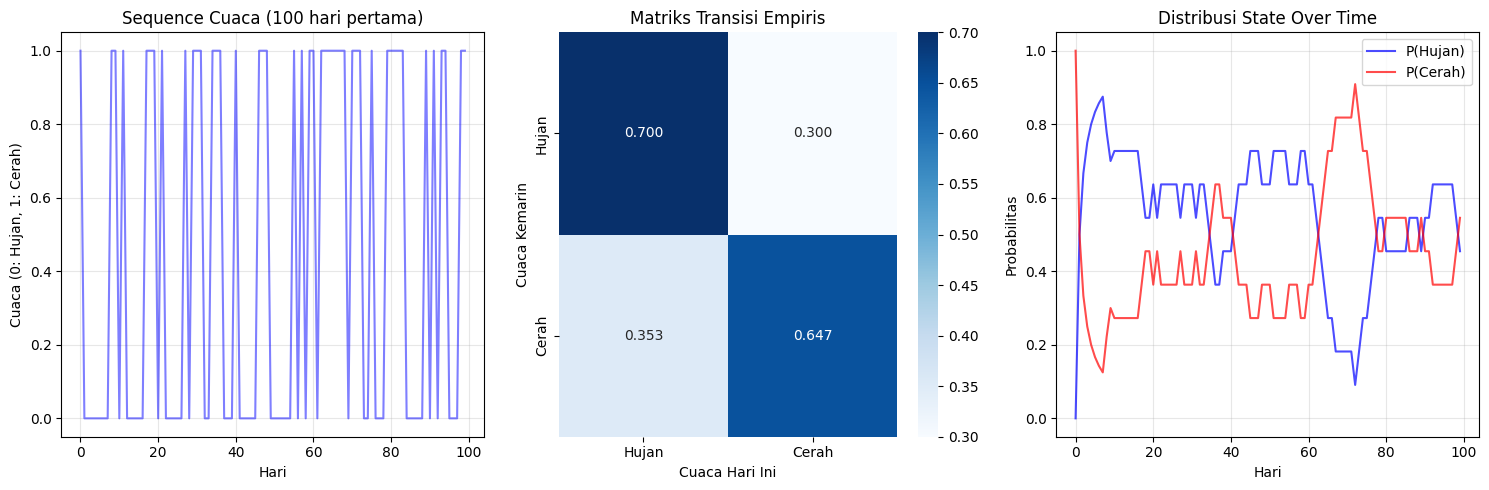

Probabilitas Transisi Empiris:

P(Cuaca_t | Cuaca_{t-1}):
P(Hujan|Hujan) = 0.7000
P(Cerah|Hujan) = 0.3000
P(Hujan|Cerah) = 0.3529
P(Cerah|Cerah) = 0.6471


In [53]:
# Simulasi urutan kejadian (contoh: prediksi cuaca)
n_days = 1000

# Probabilitas transisi
# P(Rain_t | Rain_{t-1})
p_rain_given_rain = 0.7    # Jika hari ini hujan, besok hujan dengan p=0.7
p_rain_given_sunny = 0.3   # Jika hari ini cerah, besok hujan dengan p=0.3

# Generate sequence
weather_seq = np.zeros(n_days)
weather_seq[0] = np.random.choice([0, 1])  # Random initial state

for t in range(1, n_days):
    if weather_seq[t-1] == 0:  # Jika kemarin hujan
        weather_seq[t] = np.random.choice([0, 1], p=[p_rain_given_rain, 1-p_rain_given_rain])
    else:  # Jika kemarin cerah
        weather_seq[t] = np.random.choice([0, 1], p=[p_rain_given_sunny, 1-p_rain_given_sunny])

# Hitung probabilitas transisi empiris
transitions = np.zeros((2, 2))
for t in range(1, n_days):
    prev_state = int(weather_seq[t-1])
    curr_state = int(weather_seq[t])
    transitions[prev_state, curr_state] += 1

# Normalize
transitions = transitions / transitions.sum(axis=1, keepdims=True)

# Visualisasi
plt.figure(figsize=(15, 5))

# Plot 1: Weather sequence
plt.subplot(131)
plt.plot(weather_seq[:100], 'b-', alpha=0.5)
plt.title('Sequence Cuaca (100 hari pertama)')
plt.xlabel('Hari')
plt.ylabel('Cuaca (0: Hujan, 1: Cerah)')
plt.grid(True, alpha=0.3)

# Plot 2: Transition matrix
plt.subplot(132)
sns.heatmap(transitions, annot=True, fmt='.3f', cmap='Blues',
            xticklabels=['Hujan', 'Cerah'],
            yticklabels=['Hujan', 'Cerah'])
plt.title('Matriks Transisi Empiris')
plt.xlabel('Cuaca Hari Ini')
plt.ylabel('Cuaca Kemarin')

# Plot 3: State distribution over time
state_dist = np.zeros((100, 2))
for t in range(100):
    state_dist[t, 0] = np.mean(weather_seq[max(0, t-10):t+1] == 0)
    state_dist[t, 1] = np.mean(weather_seq[max(0, t-10):t+1] == 1)

plt.subplot(133)
plt.plot(state_dist[:, 0], 'b-', label='P(Hujan)', alpha=0.7)
plt.plot(state_dist[:, 1], 'r-', label='P(Cerah)', alpha=0.7)
plt.title('Distribusi State Over Time')
plt.xlabel('Hari')
plt.ylabel('Probabilitas')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Probabilitas Transisi Empiris:")
print("\nP(Cuaca_t | Cuaca_{t-1}):")
print(f"P(Hujan|Hujan) = {transitions[0,0]:.4f}")
print(f"P(Cerah|Hujan) = {transitions[0,1]:.4f}")
print(f"P(Hujan|Cerah) = {transitions[1,0]:.4f}")
print(f"P(Cerah|Cerah) = {transitions[1,1]:.4f}")

## Kesimpulan

Dalam notebook ini, kita telah mempelajari:
1. Konsep dasar probabilitas bersyarat
2. Teorema Bayes dan aplikasinya dalam machine learning
3. Chain rule probabilitas
4. Implementasi praktis dalam:
   - Naive Bayes Classification
   - Sequence Modeling
   - Probabilistic Predictions

Probabilitas bersyarat adalah konsep fundamental yang digunakan dalam:
- Pemodelan probabilistik
- Inferensi statistik
- Decision making
- Sequential data analysis

## Latihan

1. Implementasikan Naive Bayes Classifier untuk klasifikasi teks sederhana
2. Buat simulator Markov Chain dengan tiga state atau lebih
3. Visualisasikan posterior distribution menggunakan teorema Bayes
4. Analisis data sequential menggunakan chain rule probabilitas

Prediksi untuk teks baru:

Teks: 'saya belajar python programming'
Prediksi: programming
Probabilitas:
- ml: 0.0714
- programming: 0.9039
- stats: 0.0247

Teks: 'deep learning adalah bagian dari machine learning'
Prediksi: ml
Probabilitas:
- ml: 0.9704
- programming: 0.0183
- stats: 0.0114


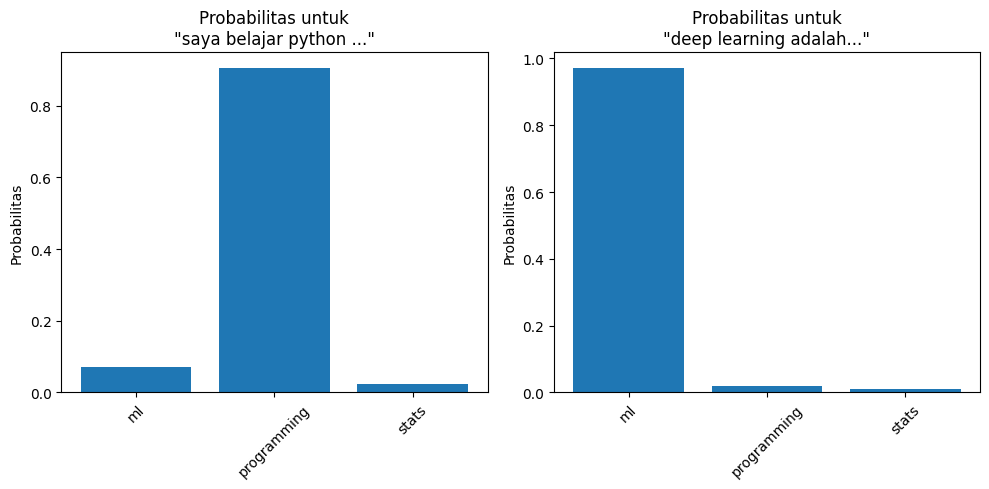

In [55]:
# Latihan 1: Naive Bayes untuk klasifikasi teks sederhana
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Data contoh
texts = [
    "saya suka programming python",
    "python adalah bahasa yang mudah",
    "machine learning sangat menarik",
    "deep learning menggunakan python",
    "matematika diperlukan untuk machine learning",
    "statistika penting dalam data science",
    "data science menggunakan python",
    "programming itu menyenangkan",
]

labels = [
    "programming", "programming", "ml", "ml",
    "ml", "stats", "programming", "programming"
]

# Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X, labels)

# Test dengan teks baru
test_texts = [
    "saya belajar python programming",
    "deep learning adalah bagian dari machine learning"
]
X_test = vectorizer.transform(test_texts)
predictions = nb.predict(X_test)
probabilities = nb.predict_proba(X_test)

# Print results
print("Prediksi untuk teks baru:")
for text, pred, probs in zip(test_texts, predictions, probabilities):
    print(f"\nTeks: '{text}'")
    print(f"Prediksi: {pred}")
    print("Probabilitas:")
    for class_label, prob in zip(nb.classes_, probs):
        print(f"- {class_label}: {prob:.4f}")

# Visualisasi probabilitas
plt.figure(figsize=(10, 5))
for i, (text, probs) in enumerate(zip(test_texts, probabilities)):
    plt.subplot(1, 2, i+1)
    plt.bar(nb.classes_, probs)
    plt.title(f'Probabilitas untuk\n"{text[:20]}..."')
    plt.xticks(rotation=45)
    plt.ylabel('Probabilitas')
    
plt.tight_layout()
plt.show()